In [ ]:
pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline

In [ ]:
Birth = pd.read_csv('D:\\karan data\\Data for Preprocessing\\Forecasting Data\\DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)
Birth.index.freq = 'D'

In [ ]:
Birth = Birth.iloc[:120]

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

<Axes: xlabel='Date'>

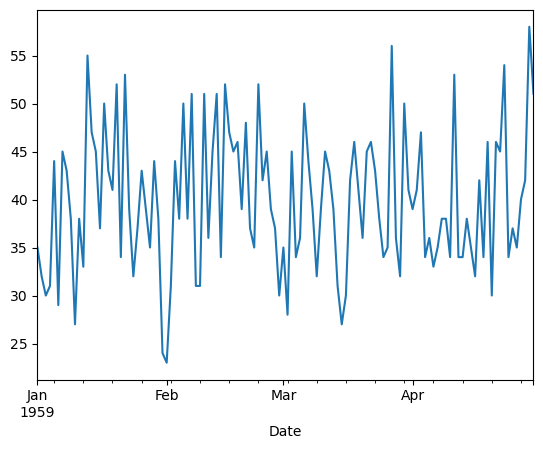

In [ ]:
Birth['Births'].plot()

In [ ]:
adf_test(Birth['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.855384e+00
p-value                 4.373545e-17
# lags used             0.000000e+00
# observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
auto_arima(Birth['Births'],seasonal=False, start_p=0, d=None, start_q=0, max_p=3, max_q=3, trace = True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1230.607, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=896.926, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1121.103, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=824.647, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=823.489, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=824.747, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=826.399, Time=0.13 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.652 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                        SARIMAX   Log Likelihood                -409.745
Date:                Fri, 01 Mar 2024   AIC                            823.489
Time:                        18:37:37   BIC                            829.064
Sample:                    01-01-1959   HQIC                           825.753
                         - 04-30-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.7833      0.687     57.896      0.000      38.437      41.130
sigma2        54.1197      8.319      6.506      0.000      37.815      70.424
===================================================================================
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.36   Prob(JB):                         0.26
Heteroskedasticity (H):               0.80   Skew:                             0.26
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train = Birth.iloc[:90]
test = Birth.iloc[90:]

In [ ]:
test

,Births
Date,
1959-04-01,39
1959-04-02,41
1959-04-03,47
1959-04-04,34
1959-04-05,36
1959-04-06,33
1959-04-07,35
1959-04-08,38
1959-04-09,38


In [ ]:
train

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-03-27,56
1959-03-28,36
1959-03-29,32


In [ ]:
model = ARIMA(train['Births'], order=(1,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -307.284
Date:                Fri, 01 Mar 2024   AIC                            620.568
Time:                        18:50:32   BIC                            628.034
Sample:                    01-01-1959   HQIC                           623.578
                         - 03-31-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0968      0.114      0.850      0.396      -0.126       0.320
ma.L1         -0.9997      5.759     -0.174      0.862     -12.286      10.287
sigma2        55.6603    318.130      0.175      0.861    -567.863     679.184
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 1.92
Prob(Q):                              0.79   Prob(JB):                         0.38
Heteroskedasticity (H):               0.78   Skew:                             0.21
Prob(H) (two-sided):                  0.49   Kurtosis:                         2.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end).rename('ARMA(1,1,1) Predictions')

In [ ]:
predictions

1959-04-01    39.882237
1959-04-02    39.774062
1959-04-03    39.763592
1959-04-04    39.762579
1959-04-05    39.762481
1959-04-06    39.762472
1959-04-07    39.762471
1959-04-08    39.762471
1959-04-09    39.762471
1959-04-10    39.762471
1959-04-11    39.762471
1959-04-12    39.762471
1959-04-13    39.762471
1959-04-14    39.762471
1959-04-15    39.762471
1959-04-16    39.762471
1959-04-17    39.762471
1959-04-18    39.762471
1959-04-19    39.762471
1959-04-20    39.762471
1959-04-21    39.762471
1959-04-22    39.762471
1959-04-23    39.762471
1959-04-24    39.762471
1959-04-25    39.762471
1959-04-26    39.762471
1959-04-27    39.762471
1959-04-28    39.762471
1959-04-29    39.762471
1959-04-30    39.762471
Freq: D, Name: ARMA(1,1,1) Predictions, dtype: float64

<Axes: xlabel='Date'>

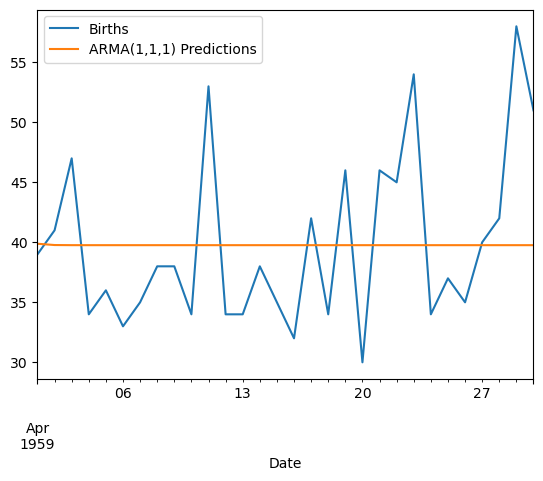

In [ ]:
test['Births'].plot(legend = True)
predictions.plot(legend = True)

In [ ]:
test.mean()

Births    39.833333
dtype: float64

In [ ]:
predictions.mean()

39.76689071581086